In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/latest_data_combined_4_21_2025.csv', encoding='latin-1')
print(len(df))
# print(df.head())

109609


In [ ]:
print(len(df['Job Title'].unique()))

23251


In [ ]:
# Lowercase all titles
df['Job Title'] = df['Job Title'].astype(str).str.lower()

# Remove special characters (keep letters, numbers, spaces)
df['Job Title'] = df['Job Title'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

# Remove location suffixes (e.g., "Karachi", "Lahore")
pakistan_cities = [
    "karachi", "lahore", "islamabad", "rawalpindi", "faisalabad",
    "multan", "peshawar", "quetta", "hyderabad", "sialkot",
    "gujranwala", "bahawalpur", "sargodha", "sahiwal", "mirpur",
    "abbottabad", "dera ghazi khan", "okara", "gujrat", "muzaffarabad",
    "rahim yar khan", "kasur", "mardan", "swat", "sukkur", "nawabshah",
    "jhelum", "mansehra", "kohat", "charsadda", "bannu", "sheikhupura",
    "vehari", "lodhran", "khairpur", "jacobabad", "gilgit", "skardu"
]

df['Job Title'] = df['Job Title'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in pakistan_cities]))
print(df['Job Title'].head(10))

0                               podcast host
1    content business development specialist
2                             medical doctor
3                          site quality head
4                             b2b sales lead
5                            sales executive
6             business development executive
7               business development manager
8                       data entry executive
9                           social mobilizer
Name: Job Title, dtype: object


In [ ]:
import re

def extract_core_title(title):
    fluff_words = [
        'senior', 'junior', 'lead', 'associate', 'principal',
        'trainee', 'intern', 'entry[- ]level', 'head', 'of',
        'consultant', 'temporary', 'temp', 'contract(ing)?', 'full[- ]time', 'part[- ]time'
        , 'staff', 'team lead', 'group lead', 'fellow'
    ]

    # Remove fluff
    pattern = r'\b(' + '|'.join(fluff_words) + r')\b'
    title = re.sub(pattern, '', title, flags=re.IGNORECASE)

    # Remove Roman numerals
    title = re.sub(r'\b([IVXLCDM]+)\b', '', title)

    # Clean up extra spaces
    return ' '.join(title.split())

In [ ]:

df['Core Title'] = df['Job Title'].apply(extract_core_title)
print(df[['Job Title', 'Core Title']].head(10))


                                 Job Title  \
0                             podcast host   
1  content business development specialist   
2                           medical doctor   
3                        site quality head   
4                           b2b sales lead   
5                          sales executive   
6           business development executive   
7             business development manager   
8                     data entry executive   
9                         social mobilizer   

                                Core Title  
0                             podcast host  
1  content business development specialist  
2                           medical doctor  
3                             site quality  
4                                b2b sales  
5                          sales executive  
6           business development executive  
7             business development manager  
8                     data entry executive  
9                         social mobilizer 

In [ ]:
# print(df[['Job Title', 'Core Title']].head(10))

In [ ]:
unique_core_titles = df['Core Title'].unique().tolist()
print(f"Unique Core Titles: {len(unique_core_titles)}")

Unique Core Titles: 20239


In [ ]:
# !pip install fuzzywuzzy

In [ ]:
# from fuzzywuzzy import process

# # Define a threshold (e.g., 80%) for matching
# threshold = 80

# # Create a dictionary to map core titles to standardized titles
# standardized_titles = {}
# for title in unique_core_titles:
#     # Find the closest match from the unique list
#     match, score = process.extractOne(title, unique_core_titles)
#     if score >= threshold:
#         standardized_titles[title] = match
#     else:
#         standardized_titles[title] = "other"  # Assign to a generic category if no match

# # Apply mapping to the dataset
# df['Standardized Title'] = df['Core Title'].map(standardized_titles)

In [ ]:
# Step 1: Install necessary libraries
!pip install sentence-transformers umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
print(len(df['Core Title'].unique()))

20239


In [ ]:
# Step 2: Import libraries
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load SBERT model
model = SentenceTransformer('all-mpnet-base-v2')

# Step 4: Generate embeddings for job titles
embeddings = model.encode(df['Core Title'].unique(), show_progress_bar=True)
print(embeddings.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Batches:   0%|          | 0/633 [00:00<?, ?it/s]

In [ ]:
# Step 5: Reduce dimensionality with UMAP
umap_model = umap.UMAP(
    n_neighbors=5,
    n_components=10,
    metric='cosine',
    random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

# Step 6: Cluster using HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=7,
    min_samples=3,
    metric='euclidean',
    cluster_selection_method='eom'
)

clusters = clusterer.fit_predict(reduced_embeddings)

# Step 7: Map clusters to standardized titles
cluster_df = pd.DataFrame({
    'Title': df['Core Title'].unique(),
    'Cluster': clusters
})

# Function to get the most common title in a cluster
def get_most_common_title(cluster_group):
    return cluster_group.value_counts().idxmax()

standardized_titles = {}
for cluster_id in cluster_df['Cluster'].unique():
    if cluster_id == -1:  # Skip noise points
        continue
    titles_in_cluster = cluster_df[cluster_df['Cluster'] == cluster_id]['Title']
    standardized_title = get_most_common_title(titles_in_cluster)
    standardized_titles.update(dict.fromkeys(titles_in_cluster, standardized_title))

# Step 8: Apply standardized titles to the dataset
df['Final Title'] = df['Core Title'].map(standardized_titles).fillna(df['Core Title'])

# Add "(Other)" suffix for noise points
df.loc[df['Final Title'] == df['Core Title'], 'Final Title'] += " (Other)"

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print(df[['Core Title', 'Final Title']].sample(10))

                                     Core Title  \
12928                          security analyst   
75705                email marketing specialist   
97089                           medical officer   
103329                            admin manager   
61284                                             
9661             business development executive   
93782                                hr manager   
65810   electrical and instrumentation engineer   
24980                          training program   
83337                             data engineer   

                                            Final Title  
12928                        security operations expert  
75705                email marketing specialist (Other)  
97089                                 internal medicine  
103329                            admin manager (Other)  
61284                                           (Other)  
9661             business development executive (Other)  
93782                           

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[5.72502341e-14 1.16512662e-06 5.36155149e-06 2.64762486e-05]
not reaching the requested tolerance 1.4901161193847656e-06.
Use iteration 1899 instead with accuracy 
1.8887177897390734e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.77398584e-14 5.27369720e-07 1.41690980e-06 5.60884083e-06]
not reaching the requested tolerance 1.4901161193847656e-06.
  _, diffusion_map =

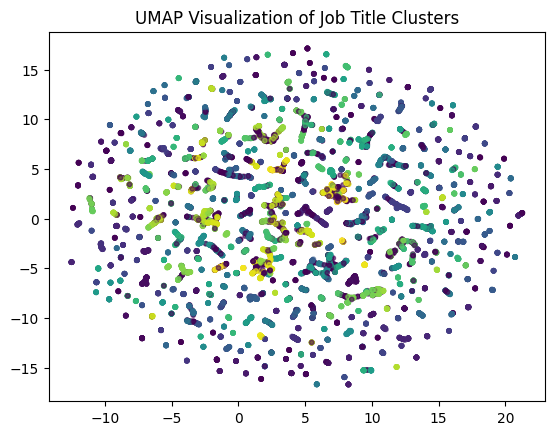

In [ ]:
# # Reduce to 2D for visualization
# umap_plot = umap.UMAP(n_components=2, random_state=42)
# embeddings_2d = umap_plot.fit_transform(reduced_embeddings)

# # Plot clusters
# plt.scatter(
#     embeddings_2d[:, 0],
#     embeddings_2d[:, 1],
#     c=clusters,
#     cmap='viridis',
#     s=10,
#     alpha=0.6
# )
# plt.title("UMAP Visualization of Job Title Clusters")
# plt.show()

In [ ]:
# prompt: count the records that dont have "(other)" in final title

# Count records without "(other)" in 'Final Title'
count_no_other = len(df[~df['Final Title'].str.contains('\(Other\)')] )
print(f"Number of records without '(Other)' in 'Final Title': {count_no_other}")


Number of records without '(Other)' in 'Final Title': 61460


In [ ]:
# prompt: show only from final title unique that dont have string (Other) in them

# Filter out titles containing "(Other)"
filtered_titles = df[df['Final Title'].str.contains('\(Other\)')]

# Get the unique filtered titles
unique_filtered_titles = filtered_titles['Final Title'].unique()

print(len(unique_filtered_titles))

# # Print the unique filtered titles
for title in unique_filtered_titles:
    print(title)


4580
podcast host (Other)
content business development specialist (Other)
medical doctor (Other)
site quality (Other)
b2b sales (Other)
sales executive (Other)
business development executive (Other)
data entry executive (Other)
social mobilizer (Other)
provincial mel assistant (Other)
provincial project assistant communication and mis (Other)
chat support executive (Other)
offering management (Other)
business analyst (Other)
hr (Other)
digital marketing specialist (Other)
trade finance manager (Other)
presales engineer (Other)
international sales support specialist (Other)
ebooks front sales agent (Other)
field marketing (Other)
administrative assistant (Other)
chatbased agent (Other)
security operations expert (Other)
onsite service technician (Other)
freight logistics specialist (Other)
executive director (Other)
content creator (Other)
audio script adherence expert (Other)
image processing and editing professional (Other)
industrial machinery specialist (Other)
teacher (Other)
monte

In [ ]:
# prompt: only show the count of records which have (Other) in final title and records having them are greater than 50.

# Count records with "(Other)" in 'Final Title' and count > 5
other_titles = df[df['Final Title'].str.contains('\(Other\)')]['Final Title'].value_counts()
other_titles_filtered = other_titles[other_titles < 5]

len(other_titles_filtered)


3679

In [ ]:

# Count records with "(Other)" in 'Final Title' and count > 5
other_titles = df[~df['Final Title'].str.contains('\(Other\)')]['Final Title'].value_counts()
other_titles_filtered = other_titles[other_titles < 7]

len(other_titles)

969

In [ ]:
# Step 1: Count all (Other) titles
other_titles_counts = df[df['Final Title'].str.contains(r'\(Other\)')]['Final Title'].value_counts()

# Step 2: Identify the rare ones (< 5 times)
rare_other_titles = other_titles_counts[other_titles_counts < 7].index

# Step 3: Replace them with 'Rare'
df['Final Title'] = df['Final Title'].apply(
    lambda x: 'Rare' if x in rare_other_titles else x
)

In [ ]:
# prompt: count of records having Rare in final title

# Count records having 'Rare' in 'Final Title'
rare_title_count = len(df[df['Final Title'] == 'Rare'])
non_rare_title_count = len(df[df['Final Title'] != 'Rare'])
print(f"Number of records with 'Rare' in 'Final Title': {rare_title_count}")
print(f"Number of records with Non 'Rare' in 'Final Title': {non_rare_title_count}")

Number of records with 'Rare' in 'Final Title': 7587
Number of records with Non 'Rare' in 'Final Title': 102022


Reduced 17,700 something unique job titles to 1200 something, on cost of 6070
records.

In [ ]:
# prompt: unique entries in final title

# Count the unique entries in the 'Final Title' column
unique_final_titles_count = len(df['Final Title'].unique())
print(f"Number of unique entries in 'Final Title': {unique_final_titles_count}")

print("Number of unique Job Titles: ", len(df['Job Title'].unique()))


Number of unique entries in 'Final Title': 5549
Number of unique Job Titles:  22617


In [ ]:
# prompt: unique entries in final title that are not rare

# Count the unique entries in 'Final Title' that are NOT 'Rare'
unique_non_rare_titles_count = len(df[df['Final Title'] != 'Rare']['Final Title'].unique())
print(f"Number of unique entries in 'Final Title' (excluding 'Rare'): {unique_non_rare_titles_count}")


Number of unique entries in 'Final Title' (excluding 'Rare'): 1630


In [ ]:
# prompt: how many time software developer is in final title. exactly same word software developer, only software developer, not anything else.  exactly equal to software developer

# Count occurrences of "software developer" in the 'Final Title' column
software_developer_count = df[df['Final Title'] == 'hr'].shape[0]

print(f"The title 'software developer' appears {software_developer_count} times in the 'Final Title' column.")


The title 'software developer' appears 461 times in the 'Final Title' column.


In [ ]:
# prompt: show the  core titles where final title is babylonjs all of them

# Display core titles where the final title is "babylonjs"
babylonjs_core_titles = df[df['Final Title'] == 'software developer']['Core Title'].unique()
babylonjs_core_titles
# len(babylonjs_core_titles)

array(['software developer', 'software engineer', 'deployment engineer',
       'software development engineer', 'software development',
       'software engineering', 'program development specialist',
       'software development engineer iii', 'application engineer',
       'sysops engineer', 'system engineer',
       'software applications engineer', 'platform engineer',
       'deployment implementation engineer',
       'software development expert', 'software engineer ii',
       'systems engineer', 'release engineer',
       'software engineer assembler', 'software engineering tech',
       'assistant software engineer', 'principle software engineer',
       'softwaresystem programmer', 'application software developer',
       'system operations engineer', 'application development engineer',
       'software design engineer', 'vice president software engineering',
       'technical software development', 'software qatesting engineer',
       'functional software engineer', 'soft

In [ ]:
# prompt: remove string (Other) from all final titles, if it exists, and just keep the title except (Other)

# Remove "(Other)" suffix from 'Final Title' if present
df['Final Title'] = df['Final Title'].str.replace(r'\s*\(Other\)', '', regex=True)


In [ ]:
# prompt: number of unique final title not rare

# Count the unique entries in 'Final Title' that are NOT 'Rare'
unique_non_rare_titles_count = df[df['Final Title'] != 'Rare']['Final Title'].unique()

for x in unique_non_rare_titles_count[:20]:
  print(x)

podcast host
medical doctor
b2b sales
sales executive
business development executive
data entry executive
social mobilizer
provincial mel assistant
provincial project assistant communication and mis
chat support executive
business analyst
hr
digital marketing specialist
presales engineer
administrative assistant
content creator
teacher
admin officer
project manager
accountant


In [ ]:
# Count records having 'Rare' in 'Final Title'
rare_title_count = len(df[df['Final Title'] == 'Rare'])
non_rare_title_count = len(df[df['Final Title'] != 'Rare'])
print(f"Number of records with 'Rare' in 'Final Title': {rare_title_count}")
print(f"Number of records with Non 'Rare' in 'Final Title': {non_rare_title_count}")

Number of records with Non 'Rare' in 'Final Title': 102022


In [ ]:
# prompt: count the number of records that have industry information technology

# Assuming 'df' is your DataFrame as defined in the provided code.

# Count records where 'Industry' is "Information Technology"
it_count = len(df[df['Industry'] == 'Information Technology'])

print(f"Number of records with Industry 'Information Technology': {it_count}")


Number of records with Industry 'Information Technology': 30676


In [ ]:
# prompt: save it in drive

# Save the DataFrame to a CSV file in your Google Drive
df.to_csv('/content/drive/My Drive/processed_job_titles.csv', index=False)


### **Industries Standardization**

In [ ]:
# prompt: /content/drive/My Drive/processed_job_titles.csv load this df

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/processed_job_titles.csv')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                 Job Title                Company  \
0                             podcast host               Origency   
1  content business development specialist           Steps Global   
2                           medical doctor  å·´åºæ¯å¦åæå¤   
3                        site quality head                Reckitt   
4                           b2b sales lead         Right Solution   

                Location Date Posted                     Salary  \
0      Karachi, Pakistan    6/2/2025                        NaN   
1      Karachi, Pakistan    4/2/2025                        NaN   
2  å·´åºæ¯å¦åæå¤    3/2/2025                        NaN   
3  å·´åºæ¯å¦åæå¤    2/2/2025                        NaN   
4      Karachi, Pakistan  24/01/2025  150,000-180,000 per month   

                                    Technical skills 

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

industry_df = df["Industry"].value_counts().reset_index()
industry_df.columns = ["Industry", "Job_Count"]
print(industry_df)

                          Industry  Job_Count
0           information technology      30676
1                            sales       8463
2                          finance       7807
3                       healthcare       6759
4                        education       6151
..                             ...        ...
756  architecture and construction          1
757             tourism/recreation          1
758              sales engineering          1
759   engineering and construction          1
760         business and economics          1

[761 rows x 2 columns]


In [ ]:
# Define a threshold for rare industries
threshold = 100

# Identify industries with fewer than 50 job postings
rare_industries = industry_df[industry_df["Job_Count"] < threshold]["Industry"]

# Replace rare industries with "Other Industries"
df["Grouped_Industry"] = df["Industry"].apply(lambda x: "Other Industries" if x in rare_industries.values else x)

# Check the new distribution
df["Grouped_Industry"].value_counts()



,count
Grouped_Industry,
information technology,30676
sales,8463
finance,7807
healthcare,6759
education,6151
marketing and advertising,5919
Other Industries,5592
human resources,3523
customer service,3318


In [ ]:
# Define manual grouping for similar industries
industry_mapping = {
    "it & software development": ["information technology"],
    "engineering": ["mechanical engineering", "civil engineering", "electrical engineering",
                    "architecture & engineering", "engineering"],
    "agriculture": ["agriculture", "farming", "agribusiness", "horticulture"],
    "finance": ["finance", "financial services", "investment banking", "insurance"],
    "healthcare": ["healthcare", "pharmaceutical", "pharmaceutical sales", "biotechnology"],
    "marketing & advertising": ["marketing", "marketing & advertising", "marketing and sales",
                                 "marketing and advertising", "market research", "market research"],
    "education": ["education", "education & training"],
    "telecommunications": ["telecommunications"],
    "hospitality & tourism": ["hospitality", "food service", "food and beverage", "travel and tourism"],
    "non-profit & NGOs": ["non-profit", "non-profit/ngo", "non-profit/human rights",
                          "non-profit/development", "international affairs/non-profit",
                          "human rights", "international affairs", "international development"],
    "transportation & logistics": ["transportation", "transportation/logistics", "logistics and transportation", "logistics",
                                   "transportation and logistics", "logistics and supply chain",
                                   "supply chain & logistics", "supply chain management"],
    "media & communications": ["media production", "media and entertainment", "media and communication",
                               "media and communications", "entertainment", "publishing"],
    "construction & real estate": ["construction", "real estate"],
    "retail & e-commerce": ["retail", "e-commerce", "fashion"],
    "manufacturing": ["manufacturing", "production", "textiles", "chemicals"],
    "human resources": ["human resources", "recruitment"],
    "business services": ["business development", "business services", "business process outsourcing (bpo)",
                          "management consulting"],
    "law & legal services": ["legal services"],
    "customer service": ["customer service"],
    "automotive & energy": ["automotive", "energy", "renewable energy"],
    "arts & design": ["arts and design", "design"],
    "security": ["security"],
    "fitness & wellness": ["fitness"],
    "research & consulting": ["research", "facilities management", "procurement"],
    "government & public sector": ["government", "military"],
    # Subdivisions of "Other Industries"
    "administration & support": ["administrative & support services", "administrative and support services"],
    "sales & distribution": ["sales", "sales and marketing"],
    "writing & publishing": ["writing and editing", "publishing"],
    "legal & immigration": ["immigration services"],
    "import/export & trade": ["import/export"],
    "miscellaneous": ["Other Industries", "nan"]  # Last fallback category
}

# # Function to map industries to broader categories
# def map_industry(industry):
#     for key, values in industry_mapping.items():
#         if industry.lower() in values:
#             return key
#     return industry  # Keep it unchanged if not in mapping

# # Apply grouping
# df["Final_Grouped_Industry"] = df["Grouped_Industry"].apply(map_industry)


# Apply mapping directly from original Industry column
def map_industry(industry):
    industry = str(industry).lower()
    for key, values in industry_mapping.items():
        if industry in values:
            return key
    return "Other Industries"  # Assign if not in any category

df["Final_Grouped_Industry"] = df["Grouped_Industry"].apply(map_industry)

# Check the final distribution
len(df["Final_Grouped_Industry"].value_counts())
# df['industry']=df['Final_Grouped_Industry']


29

**Reduced industries to 29 from 761 unique industries.**

**Industry Assignment Based on Job Title Dominance**

In [ ]:
# Count how many unique industries each job title appears in
industry_counts_per_title = df.groupby('Final Title')['Final_Grouped_Industry'].nunique().reset_index()

# Filter only titles that appear in more than 1 industry
multi_industry_roles = industry_counts_per_title[industry_counts_per_title['Final_Grouped_Industry'] > 1]

# Sort by number of industries (descending)
multi_industry_roles = multi_industry_roles.sort_values('Final_Grouped_Industry', ascending=False)

# Show top 10 roles with most industry variation
print(len(multi_industry_roles))


1013


In [ ]:
# Step 1: Count how many times each job title appears in each industry
title_industry_counts = df.groupby(['Final Title', 'Final_Grouped_Industry']).size().reset_index(name='count')

# Step 2: For each job title, keep the industry with the highest count
most_common_industry = title_industry_counts.sort_values('count', ascending=False).drop_duplicates('Final Title')

# Step 3: Create a mapping: Final_Title -> Most Frequent Final_Grouped_Industry
title_to_industry_map = dict(zip(most_common_industry['Final Title'], most_common_industry['Final_Grouped_Industry']))

# Step 4: Apply this mapping to make all industries consistent based on title
df['Final_Grouped_Industry_2'] = df['Final Title'].map(title_to_industry_map)


In [ ]:
df.head(20)

,Job Title,Company,Location,Date Posted,Salary,Technical skills,Industry,Experience required,Soft skills,Education needed,Personality traits,Core Title,Final Title,Grouped_Industry,Final_Grouped_Industry,Final_Grouped_Industry_2
0,podcast host,origency,"karachi, pakistan",6/2/2025,nan,"podcasting, broadcasting, interviewing, script...",media and communications,0 years,"communication, interviewing, writing, research...","bachelor's in business, communications, media ...","{'mbti': 'enfj', 'riasec': 'enterprising, soci...",podcast host,podcast host,media and communications,media & communications,sales & distribution
1,content business development specialist,steps global,"karachi, pakistan",4/2/2025,nan,"web content writing, content strategy, content...",marketing and advertising,0 years,"communication, writing, analytical skills, pro...",nan,"{'mbti': 'estj', 'riasec': 'enterprising, conv...",content business development specialist,rare,marketing and advertising,marketing & advertising,it & software development
2,medical doctor,å·´åºæ¯å¦å æå¤,å·´åºæ¯å¦å æå¤,3/2/2025,nan,"medical practice, radiology, patient care, med...",healthcare,0 years,excellent communication and teamwork skills,"m.b.b.s., d.m.r.d.","{'mbti': 'istj', 'riasec': 'investigative, rea...",medical doctor,medical doctor,healthcare,healthcare,healthcare
3,site quality head,reckitt,å·´åºæ¯å¦å æå¤,2/2/2025,nan,"quality control, quality assurance, cgmp, glp,...",pharmaceutical,8 years,good communication and inter / intra personal ...,doctor of pharmacy or masterâs degree in pha...,"{'mbti': 'estj', 'riasec': 'conventional, ente...",site quality,rare,pharmaceutical,healthcare,it & software development
4,b2b sales lead,right solution,"karachi, pakistan",24/01/2025,"150,000-180,000 per month","saas, paas platforms, contract negotiation, b2...",information technology,0 years,"communication, relationship-building, negotiat...",nan,"{'mbti': 'estj', 'riasec': 'enterprising, conv...",b2b sales,b2b sales,information technology,it & software development,sales & distribution
5,sales executive,real state al-meraaj-marketing,"gulshan-e-maymar, karachi, pakistan",16/02/2025,"30,000-100,000 per month",nan,real estate,1 year,"communication, client relationship building, p...",nan,"{'mbti': 'estp', 'riasec': 'enterprising, real...",sales executive,sales executive,real estate,construction & real estate,sales & distribution
6,business development executive,real state al-meraaj-marketing,"gulshan-e-maymar, karachi, pakistan",16/02/2025,"30,000-100,000 per month",nan,real estate,1 year,"strategic planning, communication, client rela...",nan,"{'mbti': 'entj', 'riasec': 'enterprising, inve...",business development executive,business development executive,real estate,construction & real estate,it & software development
7,business development manager,real state al-meraaj-marketing,"gulshan-e-maymar, karachi, pakistan",16/02/2025,"30,000-100,000 per month",nan,real estate,1 year,"leadership, strategic planning, communication,...",nan,"{'mbti': 'entj', 'riasec': 'enterprising, conv...",business development manager,business development executive,real estate,construction & real estate,it & software development
8,data entry executive,digitechio llc,"karachi, psd, pk",16/02/2025,"rs 30,000.00 - rs 35,000.00 per month","microsoft office, google sheets, data entry, p...",information technology,1 year,"communication (written and verbal), time manag...",bachelors any,"{'mbti': 'estj', 'riasec': 'conventional, ente...",data entry executive,data entry executive,information technology,it & software development,administration & support
9,social mobilizer,rozee.pk,"karachi, psd, pk",15/02/2025,nan,"data collection, report writing, ms office",social work,2 years,"communication (written and oral), community en...",bachelors in social work or development studies,"{'mbti': 'esfj', 'riasec': 'social, enterprisi...",social mobilizer,social mobilizer,Other Industries,Other Industries,Other I

In [ ]:
# prompt: save this file in drive with name like this: job_title_dominance

from google.colab import drive
drive.mount('/content/drive')

# Save the DataFrame to a CSV file in your Google Drive
df.to_csv('/content/drive/My Drive/job_title_dominance.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df["Final_Grouped_Industry_2"].value_counts()

,count
Final_Grouped_Industry_2,
it & software development,36884
sales & distribution,11961
marketing & advertising,8898
finance,6668
education,5503
healthcare,4548
Other Industries,4369
administration & support,4289
customer service,4266


## **Personality Traits Encodings:**

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/job_title_dominance.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                 Job Title                Company  \
0                             podcast host               origency   
1  content business development specialist           steps global   
2                           medical doctor  å·´åºæ¯å¦åæå¤   
3                        site quality head                reckitt   
4                           b2b sales lead         right solution   

                Location Date Posted                     Salary  \
0      karachi, pakistan    6/2/2025                        NaN   
1      karachi, pakistan    4/2/2025                        NaN   
2  å·´åºæ¯å¦åæå¤    3/2/2025                        NaN   
3  å·´åºæ¯å¦åæå¤    2/2/2025                        NaN   
4      karachi, pakistan  24/01/2025  150,000-180,000 per month   

                                    Technical skills 

In [ ]:
import ast  # To safely convert string representation of dictionaries

def preprocess_personality(personality_str):
    """Extract personality traits from the dataset while handling missing values."""
    try:
        # Check if the input is missing or contains "N/A"
        if not personality_str or personality_str == "N/A":
            return "", "", {}  # Return empty values if missing

        personality_dict = ast.literal_eval(personality_str)  # Convert string to dictionary

        # Extract MBTI, RIASEC, and Big Five safely
        mbti = personality_dict.get("mbti", "")
        riasec = personality_dict.get("riasec", "")
        big_five = personality_dict.get("big five", {})

        # Convert Big Five scores to numerical values while checking for missing values
        big_five_numeric = {key: int(value) if value != "N/A" and value is not None else None
                            for key, value in big_five.items()}

        return mbti, riasec, big_five_numeric

    except Exception as e:
        print("Error processing:", personality_str, "Error:", e)
        return "", "", {}  # Return empty values on error

# Apply preprocessing to dataset
df["MBTI"], df["RIASEC"], df["Big Five"] = zip(*df["Personality traits"].map(preprocess_personality))

# Display updated DataFrame
df.head()


Error processing: {'mbti': 'n/a', 'riasec': 'n/a', 'big five': {'conscientiousness': 'n/a', 'openness': 'n/a', 'extraversion': 'n/a', 'agreeableness': 'n/a', 'neuroticism': 'n/a'}} Error: invalid literal for int() with base 10: 'n/a'
Error processing: {'mbti': 'n/a', 'riasec': 'n/a', 'big five': {'conscientiousness': 'n/a', 'openness': 'n/a', 'extraversion': 'n/a', 'agreeableness': 'n/a', 'neuroticism': 'n/a'}} Error: invalid literal for int() with base 10: 'n/a'
Error processing: {'mbti': 'n/a', 'riasec': 'n/a', 'big five': {'conscientiousness': 'n/a', 'openness': 'n/a', 'extraversion': 'n/a', 'agreeableness': 'n/a', 'neuroticism': 'n/a'}} Error: invalid literal for int() with base 10: 'n/a'
Error processing: {'mbti': 'n/a', 'riasec': 'n/a', 'big five': {'conscientiousness': 'n/a', 'openness': 'n/a', 'extraversion': 'n/a', 'agreeableness': 'n/a', 'neuroticism': 'n/a'}} Error: invalid literal for int() with base 10: 'n/a'
Error processing: {'mbti': 'n/a', 'riasec': 'n/a', 'big five': {

,Job Title,Company,Location,Date Posted,Salary,Technical skills,Industry,Experience required,Soft skills,Education needed,Personality traits,Core Title,Final Title,Grouped_Industry,Final_Grouped_Industry,Final_Grouped_Industry_2,MBTI,RIASEC,Big Five
0,podcast host,origency,"karachi, pakistan",6/2/2025,NaN,"podcasting, broadcasting, interviewing, script...",media and communications,0 years,"communication, interviewing, writing, research...","bachelor's in business, communications, media ...","{'mbti': 'enfj', 'riasec': 'enterprising, soci...",podcast host,podcast host,media and communications,media & communications,sales & distribution,enfj,"enterprising, social","{'conscientiousness': 4, 'openness': 3, 'extra..."
1,content business development specialist,steps global,"karachi, pakistan",4/2/2025,NaN,"web content writing, content strategy, content...",marketing and advertising,0 years,"communication, writing, analytical skills, pro...",NaN,"{'mbti': 'estj', 'riasec': 'enterprising, conv...",content business development specialist,rare,marketing and advertising,marketing & advertising,it & software development,estj,"enterprising, conventional","{'conscientiousness': 4, 'openness': 3, 'extra..."
2,medical doctor,å·´åºæ¯å¦å æå¤,å·´åºæ¯å¦å æå¤,3/2/2025,NaN,"medical practice, radiology, patient care, med...",healthcare,0 years,excellent communication and teamwork skills,"m.b.b.s., d.m.r.d.","{'mbti': 'istj', 'riasec': 'investigative, rea...",medical doctor,medical doctor,healthcare,healthcare,healthcare,istj,"investigative, realistic","{'conscientiousness': 5, 'openness': 3, 'extra..."
3,site quality head,reckitt,å·´åºæ¯å¦å æå¤,2/2/2025,NaN,"quality control, quality assurance, cgmp, glp,...",pharmaceutical,8 years,good communication and inter / intra personal ...,doctor of pharmacy or masterâs degree in pha...,"{'mbti': 'estj', 'riasec': 'conventional, ente...",site quality,rare,pharmaceutical,healthcare,it & software development,estj,"conventional, enterprising","{'conscientiousness': 5, 'openness': 3, 'extra..."
4,b2b sales lead,right solution,"karachi, pakistan",24/01/2025,"150,000-180,000 per month","saas, paas platforms, contract negotiation, b2...",information technology,0 years,"communication, relationship-building, negotiat...",NaN,"{'mbti': 'estj', 'riasec': 'enterprising, conv...",b2b sales,b2b sales,information technology,it & software development,sales & distribution,estj,"enterprising, conventional","{'conscientiousness': 4, 'openness': 3, 'extra..."


In [ ]:
import numpy as np
def encode_mbti(mbti_type):
    """Convert MBTI type into a 4-dimensional binary vector."""
    if not isinstance(mbti_type, str) or len(mbti_type) != 4:
        return [np.nan, np.nan, np.nan, np.nan]  # Handle missing or invalid values

    return [
        1 if mbti_type[0] == "i" else 0,  # I/E
        1 if mbti_type[1] == "n" else 0,  # N/S
        1 if mbti_type[2] == "t" else 0,  # T/F
        1 if mbti_type[3] == "j" else 0,  # J/P
    ]

# Apply encoding to MBTI column
df[['MBTI_I/E', 'MBTI_S/N', 'MBTI_T/F', 'MBTI_J/P']] = df['MBTI'].apply(lambda x: pd.Series(encode_mbti(x)))

In [ ]:
VALID_RIASEC_TRAITS = {"r", "i", "a", "s", "e", "c"}  # Only valid traits

def clean_riasec_traits(riasec_str):
    """
    Convert full RIASEC trait names to their first-letter equivalents.
    Ignore any unknown traits that are not part of the RIASEC model.

    :param riasec_str: String of RIASEC traits, e.g., "Enterprising, Conventional"
    :return: List of first-letter traits, e.g., ["E", "C"]
    """
    if not isinstance(riasec_str, str) or not riasec_str.strip():
        return []  # Handle NaN, None, or empty strings

    traits = [trait.strip()[0] for trait in riasec_str.split(", ") if trait.strip()]
    return [t for t in traits if t in VALID_RIASEC_TRAITS]  # Keep only valid traits

# Apply cleaning function to job RIASEC column
df["Cleaned_RIASEC"] = df["RIASEC"].apply(clean_riasec_traits)

In [ ]:
def big_five_to_vector(big_five_dict):
    big_five_traits = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']
    vector = np.array([big_five_dict.get(trait, 0.0) or 0.0 for trait in big_five_traits])
    return vector

df['encoded_big_five'] = df['Big Five'].apply(lambda x: big_five_to_vector(x if isinstance(x, dict) else {}))

In [ ]:
df.head()

,Job Title,Company,Location,Date Posted,Salary,Technical skills,Industry,Experience required,Soft skills,Education needed,...,Final_Grouped_Industry_2,MBTI,RIASEC,Big Five,MBTI_I/E,MBTI_S/N,MBTI_T/F,MBTI_J/P,Cleaned_RIASEC,encoded_big_five
0,podcast host,origency,"karachi, pakistan",6/2/2025,NaN,"podcasting, broadcasting, interviewing, script...",media and communications,0 years,"communication, interviewing, writing, research...","bachelor's in business, communications, media ...",...,sales & distribution,enfj,"enterprising, social","{'conscientiousness': 4, 'openness': 3, 'extra...",0.0,1.0,0.0,1.0,"[e, s]","[3, 4, 4, 4, 2]"
1,content business development specialist,steps global,"karachi, pakistan",4/2/2025,NaN,"web content writing, content strategy, content...",marketing and advertising,0 years,"communication, writing, analytical skills, pro...",NaN,...,it & software development,estj,"enterprising, conventional","{'conscientiousness': 4, 'openness': 3, 'extra...",0.0,0.0,1.0,1.0,"[e, c]","[3, 4, 3, 3, 3]"
2,medical doctor,å·´åºæ¯å¦å æå¤,å·´åºæ¯å¦å æå¤,3/2/2025,NaN,"medical practice, radiology, patient care, med...",healthcare,0 years,excellent communication and teamwork skills,"m.b.b.s., d.m.r.d.",...,healthcare,istj,"investigative, realistic","{'conscientiousness': 5, 'openness': 3, 'extra...",1.0,0.0,1.0,1.0,"[i, r]","[3, 5, 2, 4, 3]"
3,site quality head,reckitt,å·´åºæ¯å¦å æå¤,2/2/2025,NaN,"quality control, quality assurance, cgmp, glp,...",pharmaceutical,8 years,good communication and inter / intra personal ...,doctor of pharmacy or masterâs degree in pha...,...,it & software development,estj,"conventional, enterprising","{'conscientiousness': 5, 'openness': 3, 'extra...",0.0,0.0,1.0,1.0,"[c, e]","[3, 5, 4, 3, 3]"
4,b2b sales lead,right solution,"karachi, pakistan",24/01/2025,"150,000-180,000 per month","saas, paas platforms, contract negotiation, b2...",information technology,0 years,"communication, relationship-building, negotiat...",NaN,...,sales & distribution,estj,"enterprising, conventional","{'conscientiousness': 4, 'openness': 3, 'extra...",0.0,0.0,1.0,1.0,"[e, c]","[3, 4, 4, 3, 3]"


In [ ]:

# One-hot encode cleaned RIASEC traits
def encode_riasec(riasec_list):
    all_traits = ['r', 'i', 'a', 's', 'e', 'c']
    return pd.Series([1 if trait in riasec_list else 0 for trait in all_traits], index=[f'RIASEC_{t.upper()}' for t in all_traits])

# Apply RIASEC one-hot encoding
riasec_encoded_df = df['Cleaned_RIASEC'].apply(encode_riasec)
df = pd.concat([df, riasec_encoded_df], axis=1)

In [ ]:
# Todo: have to study or potentionally improve it later


# -----------------------
# Grouping and averaging
# -----------------------

# List of encoded columns
mbti_cols = ['MBTI_I/E', 'MBTI_S/N', 'MBTI_T/F', 'MBTI_J/P']
riasec_cols = [f'RIASEC_{t.upper()}' for t in ['r', 'i', 'a', 's', 'e', 'c']]

# Big Five is stored as 5D numpy arrays, we’ll split them into separate columns
big_five_df = pd.DataFrame(df['encoded_big_five'].to_list(), columns=['BigFive_O', 'BigFive_C', 'BigFive_E', 'BigFive_A', 'BigFive_N'])
df = pd.concat([df, big_five_df], axis=1)

# Now compute averages per industry
industry_profiles = df.groupby('Final_Grouped_Industry')[
    mbti_cols + riasec_cols + list(big_five_df.columns)
].mean().reset_index()

# View result
print(industry_profiles.head())


     Final_Grouped_Industry  MBTI_I/E  MBTI_S/N  MBTI_T/F  MBTI_J/P  RIASEC_R  \
0          Other Industries  0.381243  0.167984  0.799497  0.857708  0.260551   
1  administration & support  0.335158  0.001303  0.676310  0.984102  0.082053   
2               agriculture  0.489583  0.062500  0.809028  0.923611  0.589226   
3             arts & design  0.583639  0.518616  0.302045  0.155218  0.022024   
4       automotive & energy  0.265550  0.087321  0.976077  0.938995  0.445107   

   RIASEC_I  RIASEC_A  RIASEC_S  RIASEC_E  RIASEC_C  BigFive_O  BigFive_C  \
0  0.218884  0.134299  0.186516  0.532368  0.590665   2.923104   4.239449   
1  0.002865  0.000260  0.289659  0.399583  0.936963   2.141964   4.301902   
2  0.225589  0.013468  0.070707  0.454545  0.471380   2.622896   4.131313   
3  0.896696  0.987939  0.032512  0.037231  0.022024   4.597273   3.160461   
4  0.171838  0.003580  0.026253  0.656325  0.610979   2.715990   4.262530   

   BigFive_E  BigFive_A  BigFive_N  
0   2.907904 

In [ ]:
job_roles_profiles = (
  df
    .groupby(['Final_Grouped_Industry','Final Title'])
    [ mbti_cols + riasec_cols +  list(big_five_df.columns) ]
    .mean()
    .reset_index()
)
# View result
print(job_roles_profiles.head())

  Final_Grouped_Industry                  Final Title  MBTI_I/E  MBTI_S/N  \
0       Other Industries            2d 3d illustrator  0.714286  0.428571   
1       Other Industries                  2d animator  0.790698  0.186047   
2       Other Industries     2d game animation artist  0.900000  0.200000   
3       Other Industries          2d graphic designer  0.500000  0.500000   
4       Other Industries  2d motion graphics designer  0.000000  1.000000   

   MBTI_T/F  MBTI_J/P  RIASEC_R  RIASEC_I  RIASEC_A  RIASEC_S  RIASEC_E  \
0  1.000000  0.428571  0.571429  0.571429  0.714286  0.000000  0.000000   
1  0.418605  0.255814  0.209302  0.604651  1.000000  0.069767  0.046512   
2  0.200000  0.100000  0.000000  0.800000  1.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  1.000000  1.000000  0.000000  0.000000   
4  0.333333  0.000000  0.000000  1.000000  1.000000  0.000000  0.000000   

   RIASEC_C  BigFive_O  BigFive_C  BigFive_E  BigFive_A  BigFive_N  
0  0.142857   4.2

In [ ]:
# prompt: save to drive industry_profiles as pickle file

import pickle

# Save the industry_profiles DataFrame to a pickle file
with open('/content/drive/My Drive/industry_profiles.pickle', 'wb') as f:
  pickle.dump(industry_profiles, f)


In [ ]:

import pickle

# Save the job_roles_profiles DataFrame to a pickle file
with open('/content/drive/My Drive/job_roles_profiles.pickle', 'wb') as f:
  pickle.dump(job_roles_profiles, f)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

with open('/content/drive/My Drive/industry_profiles.pickle', 'rb') as f:
  industry_profiles = pickle.load(f)

print(industry_profiles.head())


     Final_Grouped_Industry  MBTI_I/E  MBTI_S/N  MBTI_T/F  MBTI_J/P  RIASEC_R  \
0          Other Industries  0.381243  0.167984  0.799497  0.857708  0.260551   
1  administration & support  0.335158  0.001303  0.676310  0.984102  0.082053   
2               agriculture  0.489583  0.062500  0.809028  0.923611  0.589226   
3             arts & design  0.583639  0.518616  0.302045  0.155218  0.022024   
4       automotive & energy  0.265550  0.087321  0.976077  0.938995  0.445107   

   RIASEC_I  RIASEC_A  RIASEC_S  RIASEC_E  RIASEC_C  BigFive_O  BigFive_C  \
0  0.218884  0.134299  0.186516  0.532368  0.590665   2.923104   4.239449   
1  0.002865  0.000260  0.289659  0.399583  0.936963   2.141964   4.301902   
2  0.225589  0.013468  0.070707  0.454545  0.471380   2.622896   4.131313   
3  0.896696  0.987939  0.032512  0.037231  0.022024   4.597273   3.160461   
4  0.171838  0.003580  0.026253  0.656325  0.610979   2.715990   4.262530   

   BigFive_E  BigFive_A  BigFive_N  
0   2.907904 

In [ ]:
# prompt: load from pickle file

import pickle

with open('/content/drive/My Drive/job_roles_profiles.pickle', 'rb') as f:
  job_roles_profiles = pickle.load(f)

print(job_roles_profiles.head())

                   Final Title  MBTI_I/E  MBTI_S/N  MBTI_T/F  MBTI_J/P  \
0            2d 3d illustrator  0.733333  0.616667  0.900000  0.483333   
1                  2d animator  0.721154  0.278846  0.509615  0.307692   
2     2d game animation artist  0.805556  0.277778  0.194444  0.027778   
3          2d graphic designer  0.857143  0.142857  0.000000  0.000000   
4  2d motion graphics designer  0.271186  0.796610  0.542373  0.084746   

   RIASEC_R  RIASEC_I  RIASEC_A  RIASEC_S  RIASEC_E  RIASEC_C  BigFive_O  \
0  0.250000  0.866667  0.850000  0.000000  0.000000  0.016667   4.550000   
1  0.192308  0.634615  0.961538  0.096154  0.076923  0.028846   4.442308   
2  0.027778  0.666667  1.000000  0.222222  0.027778  0.000000   4.833333   
3  0.000000  1.000000  1.000000  0.000000  0.000000  0.000000   4.714286   
4  0.000000  0.881356  1.000000  0.016949  0.101695  0.000000   4.677966   

   BigFive_C  BigFive_E  BigFive_A  BigFive_N  
0   3.783333   2.366667   3.066667   2.366667  
1 

In [ ]:
import numpy as np

def calculate_riasec_similarity(user_vector, industry_vector):
    """
    Calculate cosine similarity between user and industry RIASEC vectors.
    """
    user_vector = np.array(user_vector).reshape(1, -1)
    industry_vector = np.array(industry_vector).reshape(1, -1)

    sim_score = cosine_similarity(user_vector, industry_vector)[0][0]
    return sim_score



In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# Adjusted matching function to handle the provided industry profiles
def match_user(user, basedOn, industry_profiles, top_n=5):
    user_mbti_vector = user['mbti_vector']
    user_big_five_vector = user['big_five_vector']
    user_riasec_letters = user['riasec_vector']  # like ['e', 's']

    industry_scores = []

    for idx, row in industry_profiles.iterrows():
        industry_mbti_vector = row[['MBTI_I/E', 'MBTI_S/N', 'MBTI_T/F', 'MBTI_J/P']].values
        industry_big_five_vector = row[['BigFive_O', 'BigFive_C', 'BigFive_E', 'BigFive_A', 'BigFive_N']].values
        industry_riasec_vector = row[['RIASEC_R', 'RIASEC_I', 'RIASEC_A', 'RIASEC_S', 'RIASEC_E', 'RIASEC_C']].values

        mbti_sim = cosine_similarity([user_mbti_vector], [industry_mbti_vector])[0][0]
        big_five_sim = cosine_similarity([user_big_five_vector], [industry_big_five_vector])[0][0]
        riasec_sim = calculate_riasec_similarity(user_riasec_letters, industry_riasec_vector)

        total_score = (0.3 * big_five_sim) + (0.2 * mbti_sim) + (0.5 * riasec_sim)

        industry_scores.append((row[basedOn], total_score))

    # Sort industries by score (highest first) and get top_n industries
    sorted_industries = sorted(industry_scores, key=lambda x: x[1], reverse=True)
    top_industries = sorted_industries[:top_n]

    return top_industries

# Example user profile (with raw Big Five and RIASEC data)

user_profile = {
    'mbti_vector': np.array([1, 0, 0, 0]),  # placeholder MBTI
    'riasec_vector': np.array([
        0.3,  # R: Realistic (somewhat logical/practical)
        0.2,  # I: Investigative (curious minds often exist with E/S)
        0.1,  # A: Artistic (low)
        0.6,  # S: Social (main strength)
        0.7,  # E: Enterprising (main strength)
        0.4,  # C: Conventional (secondary, because E/C often correlate)
    ]),
    'big_five_vector': np.array([5, 3, 4, 4, 2])  # as you gave (Openness high, Agreeableness low)
}


# Run the function to get the top 5 industries
top_industries = match_user(user_profile, 'Final_Grouped_Industry', industry_profiles, top_n=20)

# Output the results
print("\n🔍 Top 5 industry matches:")
for industry, score in top_industries:
    print(f"{industry}: Score = {score:.3f}")



🔍 Top 5 industry matches:
healthcare: Score = 0.793
Other Industries: Score = 0.791
education: Score = 0.786
hospitality & tourism: Score = 0.784
marketing & advertising: Score = 0.770
telecommunications: Score = 0.750
agriculture: Score = 0.750
retail & e-commerce: Score = 0.747
customer service: Score = 0.745
non-profit & NGOs: Score = 0.745
human resources: Score = 0.740
automotive & energy: Score = 0.727
miscellaneous: Score = 0.726
construction & real estate: Score = 0.726
government & public sector: Score = 0.721
transportation & logistics: Score = 0.715
sales & distribution: Score = 0.706
administration & support: Score = 0.704
business services: Score = 0.690
law & legal services: Score = 0.687


In [ ]:
# Handle missing values by filling NaNs with zeros (or use any other appropriate strategy)
job_roles_profiles.fillna(0, inplace=True)

In [ ]:
# Example user profile (with raw Big Five and RIASEC data)
user_profile = {
    'mbti_vector': np.array([0, 0, 0, 0]),  # placeholder MBTI
    'riasec_vector': np.array([
        0.3,  # R: Realistic (somewhat logical/practical)
        0.2,  # I: Investigative (curious minds often exist with E/S)
        0.1,  # A: Artistic (low)
        0.6,  # S: Social (main strength)
        0.7,  # E: Enterprising (main strength)
        0.4,  # C: Conventional (secondary, because E/C often correlate)
    ]),
    'big_five_vector': np.array([5, 3, 4, 4, 2])  # as you gave (Openness high, Agreeableness low)
}

# First, filter for only job roles under 'Education' industry
education_job_roles_profiles = job_roles_profiles[
    job_roles_profiles['Final_Grouped_Industry'] == 'marketing & advertising'
]

# Now run the match function on this smaller set
top_job_roles = match_user(user_profile, 'Final Title', education_job_roles_profiles, top_n=10)

# Output the results
print("\n🔍 Top 10 Education job role matches:")
for job_role, score in top_job_roles:
    print(f"{job_role}: Score = {score:.3f}")


🔍 Top 10 Education job role matches:
cofounder: Score = 0.759
sales agent facebook sales: Score = 0.757
ceo: Score = 0.756
influencer marketing manager: Score = 0.754
sales marketing: Score = 0.754
am marketing services: Score = 0.753
talent acquisition employer branding: Score = 0.751
clientside service specialist: Score = 0.750
calling agent: Score = 0.749
sales agent chat support: Score = 0.749


## **Next Steps:**


*   Normalize results using an LLM
*   Look for frequency of job roles in dataset.
*   Look for how many industries a job role appears in. give that to LLM as  
    well, for better description





In [ ]:
# prompt: write code to randomly select from these two strings "DevSparkle","CiviSolve"

import random

options = ["DevSparkle", "CiviSolve"]
selected_string = random.choice(options)
selected_string


'CiviSolve'